In [185]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [186]:
train_path = '../archive/POTATO/Training/'
validation_path = '../archive/POTATO/Validation/'
test_path='../archive/POTATO/Testing/'

In [187]:
image_gen = ImageDataGenerator(rescale=1./255,
                               # 이미지를 -40도에서 40도 범위 내에서 임의로 회전
                               rotation_range=40,
                               
                               # 이미지 크기의 최대 20%까지 이미지의 너비와 높이를 임의로 이동
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               
                               # 최대 전단 각도가 20도인 이미지에 임의로 전단 변환을 적용
                               shear_range=0.2,
                               
                               # 이미지를 최대 20%까지 무작위로 확대
                               zoom_range=0.2,
                               
                               # 무작위로 뒤집                                      
                               horizontal_flip=True,
                               
                               # 확대 중에 새로 생성된 모든 픽셀이 원본 이미지에서 가장 가까운 픽셀 값으로 채워짐
                               fill_mode='nearest')


In [188]:
# flow_from_directory 함수로 폴더에서 이미지를 가져와 제네레이터 객체로 정리
train_gen = image_gen.flow_from_directory(train_path,
                                          batch_size=32,
                                          target_size = (224,224),
                                          classes = ['Early_Blight','Healthy','Late_Blight'],
                                          class_mode = 'sparse',
                                          seed =2020)


Found 3251 images belonging to 3 classes.


In [189]:
train_gen.labels, train_gen[0][0].shape, train_gen[0][1].shape

(array([0, 0, 0, ..., 2, 2, 2]), (32, 224, 224, 3), (32,))

In [190]:

valid_gen = image_gen.flow_from_directory(validation_path,batch_size=32,
                                          target_size = (224,224),
                                          classes = ['Early_Blight','Healthy','Late_Blight'],
                                          class_mode = 'sparse',
                                          seed =2020)


Found 416 images belonging to 3 classes.


In [191]:

test_gen = image_gen.flow_from_directory(test_path,batch_size=32,
                                          target_size = (224,224),
                                          classes = ['Early_Blight','Healthy','Late_Blight'],
                                          class_mode = 'sparse',
                                          seed =2020)

Found 405 images belonging to 3 classes.


c:\Users\USER\anaconda3\envs\DL_37\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == "":


0.0
1.0
1.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
1.0
1.0
2.0
0.0
1.0
0.0


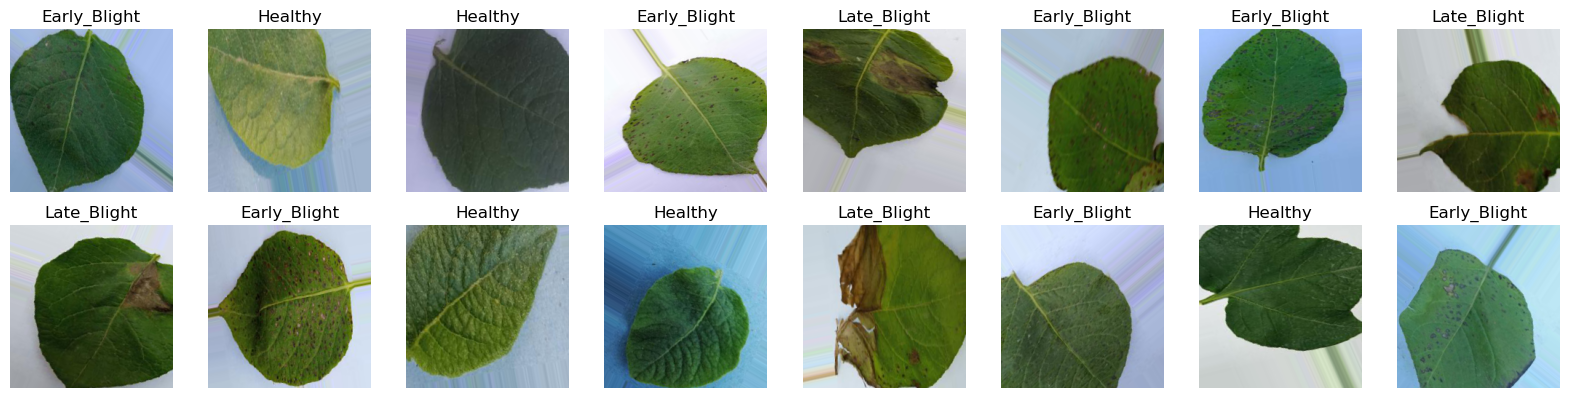

In [192]:
# 샘플 이미지 출력

class_labels = ['Early_Blight','Healthy','Late_Blight']
batch = next(train_gen)
images,labels = batch[0],batch[1]

plt.figure(figsize=(16,8))
for i in range(16):

    ax = plt.subplot(4,8,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int)])
    print(labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [193]:
train_gen.image_shape

(224, 224, 3)

In [194]:
# Functional API
input_layer = tf.keras.Input(shape=(224, 224, 3), name='InputLayer')

x1= tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='Conv2D1')(input_layer)
x2= tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool1')(x1)

x3= tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='Conv2D2')(x2)
x4= tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2')(x3)

x5= tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='Conv2D3')(x4)
x6= tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool3')(x5)

x7= tf.keras.layers.Conv2D(256, (3, 3), activation='relu', name='Conv2D4')(x6)
x8= tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool4')(x7)

x9= tf.keras.layers.Flatten(name='Conv2D5')(x8)
x10= tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x9)
x11= tf.keras.layers.Dropout(0.5)(x10)
x12= tf.keras.layers.Dense(3, activation='softmax', name='OutputLayer')(x11)

model=tf.keras.Model(inputs=input_layer, outputs=x12, name='FunctionalModel')




In [242]:
model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv2D1 (Conv2D)            (None, 222, 222, 32)      896       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 111, 111, 32)      0         
                                                                 
 Conv2D2 (Conv2D)            (None, 109, 109, 64)      18496     
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 54, 54, 64)        0         
                                                                 
 Conv2D3 (Conv2D)            (None, 52, 52, 128)       73856     
                                                                 
 MaxPool3 (MaxPooling2D)     (None, 26, 26, 128)   

In [162]:
# !pip install pydot

In [163]:
# !pip install graphviz

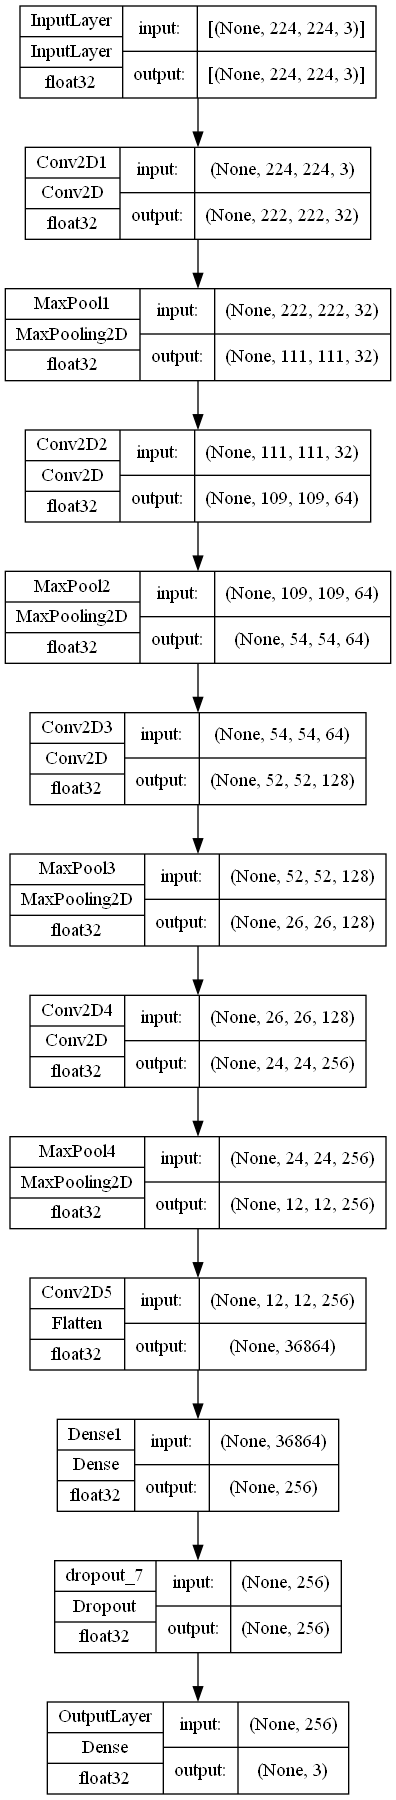

In [196]:
# 모델 구조 확인하기
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True)

In [197]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [199]:
# 모델 체크포인트
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='Potato_leaves.ckp',
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='val_accuracy',
                                                verbose=1)

In [200]:
# earlystopping
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.1 ,patience=5)

In [201]:
# 교육 및 유효성 검사 측정항목에 대한 정보가 포함된 'History' 개체를 반환
history = model.fit(
    train_gen,
    epochs=25,
    validation_data=valid_gen,
    callbacks=[checkpoint, earlystopping]
)

Epoch 1/25
102/102 [==============================] - ETA: 0s - loss: 1.0564 - accuracy: 0.4432
Epoch 1: val_accuracy improved from -inf to 0.44471, saving model to Potato_leaves.ckp
102/102 [==============================] - 138s 1s/step - loss: 1.0564 - accuracy: 0.4432 - val_loss: 1.0100 - val_accuracy: 0.4447
Epoch 2/25
102/102 [==============================] - ETA: 0s - loss: 0.9453 - accuracy: 0.5555
Epoch 2: val_accuracy improved from 0.44471 to 0.61298, saving model to Potato_leaves.ckp
102/102 [==============================] - 173s 2s/step - loss: 0.9453 - accuracy: 0.5555 - val_loss: 0.7880 - val_accuracy: 0.6130
Epoch 3/25
102/102 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.7075
Epoch 3: val_accuracy improved from 0.61298 to 0.61779, saving model to Potato_leaves.ckp
102/102 [==============================] - 181s 2s/step - loss: 0.7225 - accuracy: 0.7075 - val_loss: 0.8695 - val_accuracy: 0.6178
Epoch 4/25
102/102 [=============================

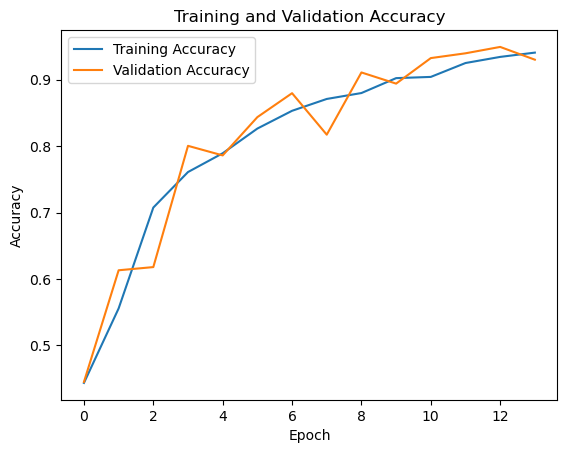

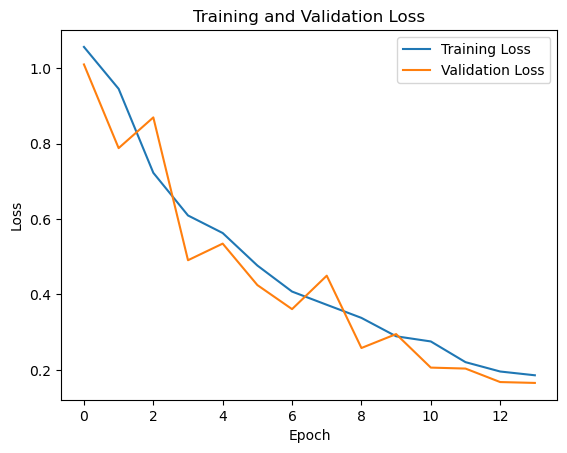

In [202]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# 정확도 그래프
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실률 그래프
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [203]:
model.save('Potato_leaf_real.h5')

In [213]:
score=my_model.evaluate(test_gen, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1816730797290802
Test accuracy: 0.9456790089607239


In [204]:
# 값을 숫자로 보고싶다면 e이딴거없이
# np.set_printoptions(floatmode='fixed', suppress=True)

In [ ]:
# from tensorflow.keras.models import load_model
# my_model = load_model('Potato_leaf_real.h5')

# # 모델 예측하기 
# predictions = my_model.predict(test_gen)
# predictions

13/13 [==============================] - 7s 519ms/step


c:\Users\USER\anaconda3\envs\DL_37\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == "":


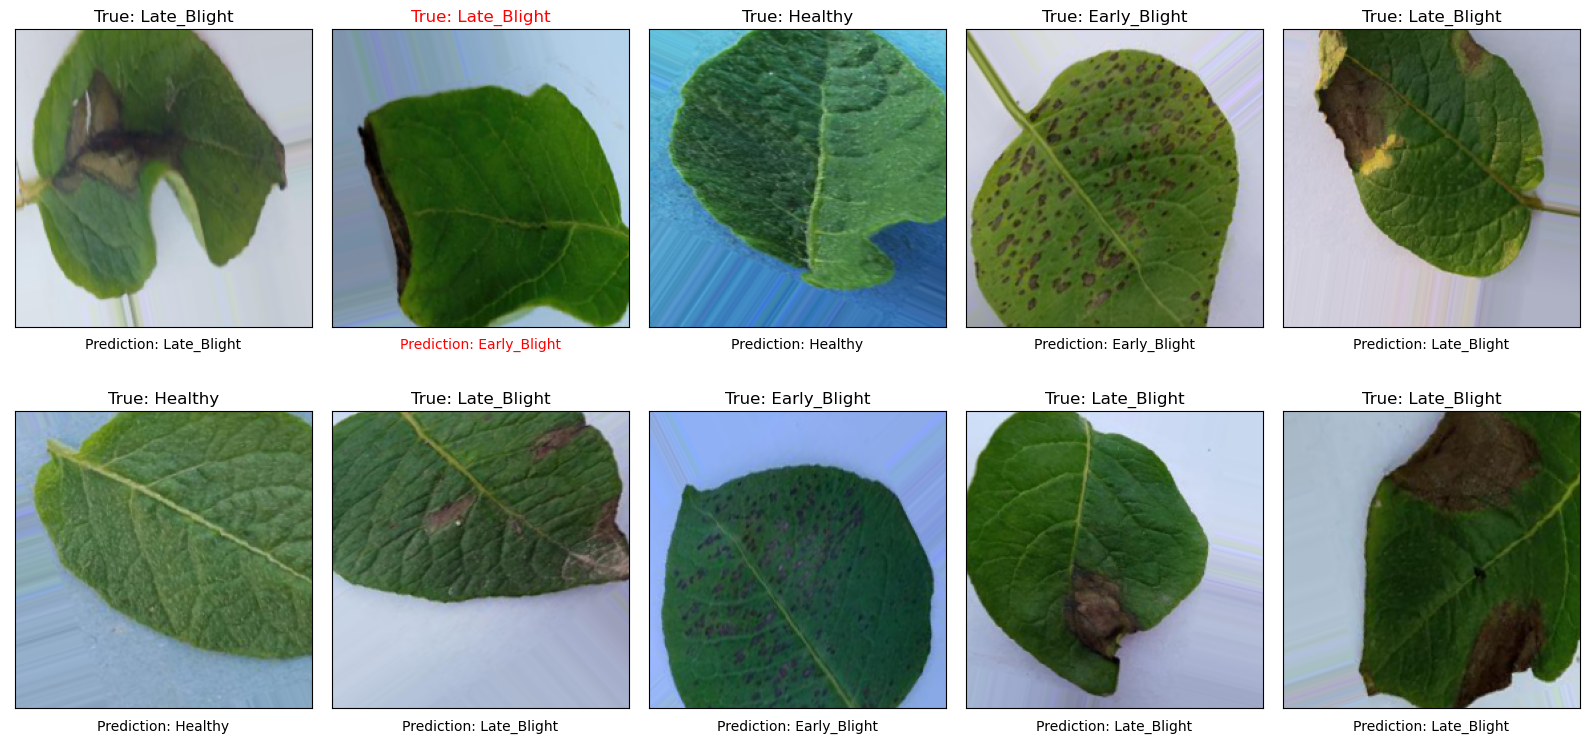

In [241]:
# 샘플 이미지 출력

class_labels = ['Early_Blight','Healthy','Late_Blight']
batch = next(test_gen)
images, labels = batch[0], batch[1]
y_pred = np.argmax(model.predict(test_gen), axis=-1)
plt.figure(figsize=(16, 8))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    y_true = labels[i].astype(np.int)
    if y_pred[i] == y_true:
        plt.imshow(images[i])
        plt.xlabel(f'Prediction: {class_labels[y_pred[i]]}')
        plt.title('True: ' + class_labels[y_true])
    else:
        plt.imshow(images[i])
        plt.xlabel(f'Prediction: {class_labels[y_pred[i]]}', color='red')
        plt.title('True: ' + class_labels[y_true], color='red')
plt.tight_layout()
plt.show()
